# TAREA COLABORATIVA M2 - DIONISIO MORENO CAÑAS

## 0.1. <a id='Introducción'>Introducción</a>

A continuación se realiza la integración de la propuesta de eventos de Wyscout (Dataset Abierto de Nature) junto con algunas modificaciones del código base citado más adelante.
Se pretende así una comprensión y visualización de su estructura y funcionamiento. 

Solo se han incluido y/o modificado algunas de las partes del código a criterio propio, pero considero que el resto de cuestiones pese a no ser introducidas, son de interés, por lo que recomiendo la lectura del resto de temas que no he incluido.

## 0.2. <a id='Referencia'>Referencia</a>

Todo el material de base para este ejercicio lo he obtenido de:
- https://github.com/Friends-of-Tracking-Data-FoTD/mapping-match-events-in-Python
- https://github.com/jonpappalord/soccer_logs_exploration

Dataset: 

- Pappalardo, Luca; Massucco, Emanuele (2019): Soccer match event dataset. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4415000.v5

Y una descripción detallada:

- Pappalardo, L., Cintia, P., Rossi, A. et al. **A public data set of spatio-temporal match events in soccer competitions**. Scientific Data 6, 236 (2019) doi:10.1038/s41597-019-0247-7, https://www.nature.com/articles/s41597-019-0247-7

## 1. <a id='import_libraries'>Importar librerías</a>

In [1]:
%matplotlib inline

from utils import *
from plot_utils import *
from metrics import *

import warnings
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

## 2. <a id='load_public_dataset'>Cargar los datasets</a>
Se importa un conjunto de partidos, eventos, jugadores y competiciones de
<a href="https://doi.org/10.6084/m9.figshare.c.4415000.v5">figshare repository</a>. Data are stored in `.json` format. 

Se ha realizado un pequeño fragmento de código para la descarga y almacenamiento de este dataset en un subdirectorio 'data'.

El dataset contiene:
- 1,941 partidos
- 3,251,294 eventos
- 4,299 jugadores.

Las siguientes dos funciones a utilizar, <data_download()> y <load_public_dataset()> se definen en archivos externos .py que se pueden encontrar en el repositorio citado anteriormente.

In [2]:
# Descarga automática en disco desde el repositorio
data_download()

Download completed


In [3]:
# Carga del directorio descargado en nuestras estructuras de trabajo
match_id2match, match_id2events, player_id2player, competition_id2competition, team_id2team = load_public_dataset()

In [4]:
# Visualización de los nombres de las competiciones de nuestra estructura
[competition['name'] for competition in competition_id2competition.values()]

['Italian first division',
 'English first division',
 'Spanish first division',
 'French first division',
 'German first division',
 'European Championship',
 'World Cup']

## 3. <a id='structure_of_data'>Estructuras de datos<a/>

Seleccionamos en cada caso el elemento inicial (0) de la estructura para la visualización de un ejemplo.

### 3. A. <a id='competitions'>Jugadores</a>

In [5]:
a_player = list(player_id2player.keys())[0]
player_id2player[a_player]

{'passportArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'weight': 78,
 'firstName': 'Harun',
 'middleName': '',
 'lastName': 'Tekin',
 'currentTeamId': 4502,
 'birthDate': '1989-06-17',
 'height': 187,
 'role': {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalkeeper'},
 'birthArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'wyId': 32777,
 'foot': 'right',
 'shortName': 'H. Tekin',
 'currentNationalTeamId': 4687}

### 3. B. <a id='competitions'>Competiciones</a>

In [6]:
first_competition = list(competition_id2competition.keys())[0]
competition_id2competition[first_competition]

{'name': 'Italian first division',
 'wyId': 524,
 'format': 'Domestic league',
 'area': {'name': 'Italy',
  'id': '380',
  'alpha3code': 'ITA',
  'alpha2code': 'IT'},
 'type': 'club'}

### 3. C. <a id='matches'>Partidos</a>

In [7]:
a_match = list(match_id2match.keys())[0]
match_id2match[a_match]['label']

'Lazio - Internazionale, 2 - 3'

### EXPLORACIÓN DE PARTIDOS

A continuación, se realiza un pequeño análisis exploratorio e iterativo de los partidos con el fin de obtener dos estadísticas sencillas de la temporada del dataset.

### Recuento de goles en una temporada

In [8]:
sum_goals = 0
for match_id, match in match_id2match.items():
    goals = match['label'].split(', ')[1].split(' - ')
    goals = [int(goal) for goal in goals]
    sum_goals += sum(goals)
sum_goals

1017

### Media de goles por partido

In [9]:
goals_in_match = []
for match_id, match in match_id2match.items():
    goals = match['label'].split(', ')[1].split(' - ')
    goals = [int(goal) for goal in goals]
    goals_in_match.append(sum(goals))
round(np.mean(goals_in_match), 2)

2.68

### 3. D. <a id='events'>EXPLORACIÓN PROPIA</a>

Seleccionamos la clave en la posisicón **n** del diccionario de jugadores, para posteriormente acceder y visualizar su contenido. 

In [10]:
n = 7
a_player = list(player_id2player.keys())[n]
player_id2player[a_player]

{'passportArea': {'name': 'Belgium',
  'id': '56',
  'alpha3code': 'BEL',
  'alpha2code': 'BE'},
 'weight': 88,
 'firstName': 'Jan',
 'middleName': '',
 'lastName': 'Vertonghen',
 'currentTeamId': 1624,
 'birthDate': '1987-04-24',
 'height': 189,
 'role': {'code2': 'DF', 'code3': 'DEF', 'name': 'Defender'},
 'birthArea': {'name': 'Belgium',
  'id': '56',
  'alpha3code': 'BEL',
  'alpha2code': 'BE'},
 'wyId': 48,
 'foot': 'left',
 'shortName': 'J. Vertonghen',
 'currentNationalTeamId': 5629}

Observamos el último campo **currentNationalTeamId** y utilizamos su valor para acceder al equipo en la estructura **team_id2team**

In [11]:
team_id2team[5629]

{'city': 'Bruxelles (Brussel)',
 'name': 'Belgium',
 'wyId': 5629,
 'officialName': 'Belgium',
 'area': {'name': 'Belgium',
  'id': 56,
  'alpha3code': 'BEL',
  'alpha2code': 'BE'},
 'type': 'national'}

Donde podemos confirmar, que corresponde a la selección de Bélgica.

A continuación, he recorrido la estructura **player_id2player** buscando los jugadores que pertenecen a la selección de Inglaterra (2413), con el objetivo de realizar una visualización de como están repartidos entre los clubes los jugadores de dicha selección.

In [12]:
equipos = defaultdict(int) 
for player in player_id2player.values():
    if player['currentNationalTeamId'] == 2413:
        if team_id2team.get(player['currentTeamId']) is None: #En algunos jugadores este valor era nulo, de ahí este condicional
            equipos['Desconocido'] +=1
        else:
            equipos[team_id2team.get(player['currentTeamId']).get('name')] +=1

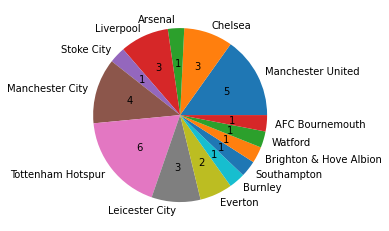

In [13]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

plt.pie([int(v) for v in equipos.values()], labels=[k for k in equipos.keys()], autopct=make_autopct(equipos.values()))
plt.show()

### 3. E. <a id='events'>Eventos</a>

Dada la magnitud de todo el listado de eventos, se muestra un ejemplo de dos eventos en un partido 

In [14]:
match_id2events[match_id][0]

{'eventId': 8,
 'subEventName': 'Simple pass',
 'tags': [{'id': 1801}],
 'playerId': 89186,
 'positions': [{'y': 49, 'x': 50}, {'y': 52, 'x': 32}],
 'matchId': 2575964,
 'eventName': 'Pass',
 'teamId': 3159,
 'matchPeriod': '1H',
 'eventSec': 1.2206110000000194,
 'subEventId': 85,
 'id': 180114026}

In [15]:
match_id2events[match_id][8]

{'eventId': 3,
 'subEventName': 'Throw in',
 'tags': [{'id': 1801}],
 'playerId': 20472,
 'positions': [{'y': 100, 'x': 33}, {'y': 97, 'x': 46}],
 'matchId': 2575964,
 'eventName': 'Free Kick',
 'teamId': 3173,
 'matchPeriod': '1H',
 'eventSec': 24.025498000000027,
 'subEventId': 36,
 'id': 180114038}

### Listado de tipos y subtipos de eventos
En https://apidocs.wyscout.com/ podemos encontrar información más detallada

In [16]:
event_types = []
for match_id, events in match_id2events.items():
    for event in events:
        event_types.append((event['eventName'], event['subEventName']))
set(event_types)

{('Duel', 'Air duel'),
 ('Duel', 'Ground attacking duel'),
 ('Duel', 'Ground defending duel'),
 ('Duel', 'Ground loose ball duel'),
 ('Foul', 'Foul'),
 ('Foul', 'Hand foul'),
 ('Foul', 'Late card foul'),
 ('Foul', 'Out of game foul'),
 ('Foul', 'Protest'),
 ('Foul', 'Simulation'),
 ('Foul', 'Time lost foul'),
 ('Foul', 'Violent Foul'),
 ('Free Kick', 'Corner'),
 ('Free Kick', 'Free Kick'),
 ('Free Kick', 'Free kick cross'),
 ('Free Kick', 'Free kick shot'),
 ('Free Kick', 'Goal kick'),
 ('Free Kick', 'Penalty'),
 ('Free Kick', 'Throw in'),
 ('Goalkeeper leaving line', 'Goalkeeper leaving line'),
 ('Interruption', 'Ball out of the field'),
 ('Interruption', 'Whistle'),
 ('Offside', ''),
 ('Others on the ball', 'Acceleration'),
 ('Others on the ball', 'Clearance'),
 ('Others on the ball', 'Touch'),
 ('Pass', 'Cross'),
 ('Pass', 'Hand pass'),
 ('Pass', 'Head pass'),
 ('Pass', 'High pass'),
 ('Pass', 'Launch'),
 ('Pass', 'Simple pass'),
 ('Pass', 'Smart pass'),
 ('Save attempt', 'Reflexes'

## 4. <a id='basic_statistics'>Estadísticas básicas</a>

### 4. A. <a id="frequency_by_type">Frecuencia para cada tipo</a>

Obtenemos la frecuencia de cada evento recorriendo todo el dataset de partidos.

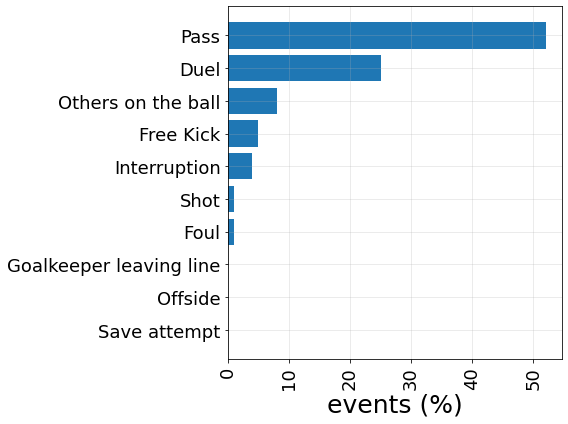

In [17]:
events_list = []
for match_id, events in match_id2events.items():
    for event in events:
        events_list.append(event['eventName'])

count = Counter(events_list)
# express frequency in percentage
counter = {}
#print(count.keys())
#print(count.values())

for i, n_events in zip(count.keys(), count.values()):
    counter[i] = int(float(n_events)/len(events_list)*100)
    #print(counter[i],'%')
sorted_d = np.array(sorted(counter.items(), key=operator.itemgetter(1), reverse=False))
#print(sorted_d)
#bar plot
fig, ax = plt.subplots(figsize=(8,6))
plt.barh(list(sorted_d[:,0]),[int(x) for x in list(sorted_d[:,1])])
plt.xticks(rotation=90);plt.xticks(fontsize=18)
plt.xlabel('events (%)', fontsize=25)
plt.yticks(fontsize=18)
plt.grid(alpha=0.3)
fig.tight_layout()
plt.show()

### 4. B. <a id='events_per_match'>Distribución del número de eventos por partido</a>

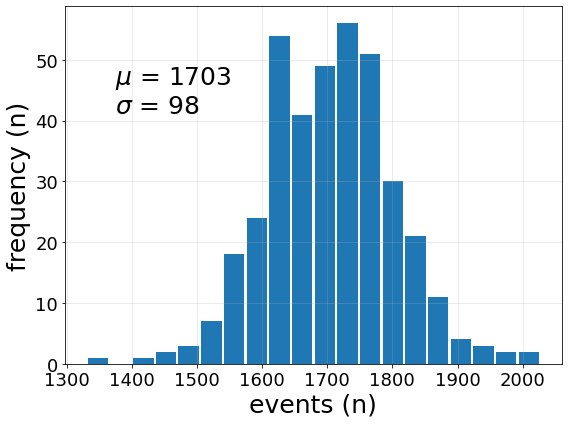

In [18]:
values = [len(events) for events in match_id2events.values()]
avg_n_events = np.mean(values)
std_n_events = np.std(values)

fig, ax = plt.subplots(figsize=(8,6))
plt.hist(values, rwidth=0.9, bins=20)
plt.grid(alpha=0.3)
plt.yticks(fontsize=18)
plt.xlabel('events (n)', fontsize=25)
plt.ylabel('frequency (n)', fontsize=25)
plt.xticks(fontsize=18)
plt.text(0.1, 0.7, 
         '$\mu$ = %i\n$\sigma$ = %i'%(avg_n_events, std_n_events), 
         fontsize=25, transform=ax.transAxes)
fig.tight_layout()
plt.show()

## 5. <a id='plot_events_on_field'>Representación de eventos en el campograma</a>
En primer lugar, seleccionamos el partido, y preparamos nuestros datos.

In [19]:
#match_id = 2576335 # a single match in Italy
match_id = 2576143 #escogemos otro partido distinto al del ejemplo del código original
match_events = match_id2events[match_id]
# match_id2match[match_id]['teamsData'].keys()
match_label = match_id2match[match_id]['label']
match_label

'Fiorentina - Milan, 1 - 1'

**Para esta parte del código, recurrimos a pandas para la construcción de nuestro DataFrame.**

In [20]:
match_df = pd.DataFrame(match_events)
#match_df 

In [21]:
match_df['x_start'] = [x[0]['x'] for x in match_df['positions']]
match_df['y_start'] = [x[0]['y'] for x in match_df['positions']]

### 5. A. <a id='static_plot'>Definición de función y pintado</a>

In [22]:
def plot_events(match_id=2576143, team_id='both', event_name='all'):
    """
    Plot the events onthe position where they have been generated.
    
    Parameters
    ----------
    match_id : int, optional
        identifier of the match to plot
        
    team_id : str or int, optional
        the identifier of the team to plot. 
        If 'both', it indicates to plot both teams The default is 'both'.
        
    event_name : str, optional
        the type of the event to plot. If 'all', it plots all the events.
        The defauult is 'all'.
    """
    match_label = match_id2match[match_id]['label']
    match_events = match_id2events[match_id]
    selected_events = []
    for event in match_events:
        if team_id == 'both' or event['teamId'] == team_id:
            if event_name == 'all' or event['eventName'] == event_name:
                selected_events.append(event)
    
    match_df = pd.DataFrame(selected_events)
    match_df['x_start'] = [x[0]['x'] for x in match_df['positions']]
    match_df['y_start'] = [x[0]['y'] for x in match_df['positions']]
    
    if team_id == 'both':
        team_1, team_2 = np.unique(match_df['teamId'])
        df_team_1 = match_df[match_df['teamId'] == team_1]
        df_team_2 = match_df[match_df['teamId'] == team_2]
    else:
        df_team = match_df[match_df['teamId'] == team_id]
    
    f = draw_pitch("white", "black", "h", "full")
    if team_id == 'both':
        plt.scatter(df_team_1['x_start'], df_team_1['y_start'], c='red', edgecolors="k", zorder=12, 
            alpha=0.5, label='%s: %s %s' %(team_id2team[team_1]['name'], len(df_team_1), 'events' if event_name=='all' else event_name))
        plt.scatter(df_team_2['x_start'], df_team_2['y_start'], marker='s', c='blue', edgecolors="w", linewidth=0.25, zorder=12, 
                    alpha=0.7, label='%s: %s %s' %(team_id2team[team_2]['name'], len(df_team_2), 'events' if event_name=='all' else event_name))
        plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
    else:
        plt.scatter(df_team['x_start'], df_team['y_start'], 
                    c='red', edgecolors="k", zorder=12, alpha=0.5,
                   label='%s: %s %s' %(team_id2team[team_id]['name'], len(df_team), 'events' if event_name=='all' else event_name))
    plt.title(match_label, fontsize=20)
    plt.legend(fontsize=20, bbox_to_anchor=(1.01, 1.05))
    plt.show()
 

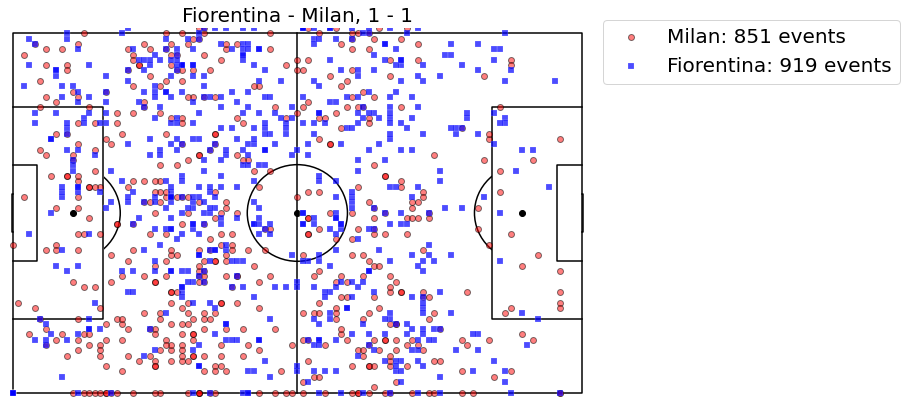

In [23]:
match_id, team1, team2 = 2576143, 3157, 3176 
plot_events(team_id='both')

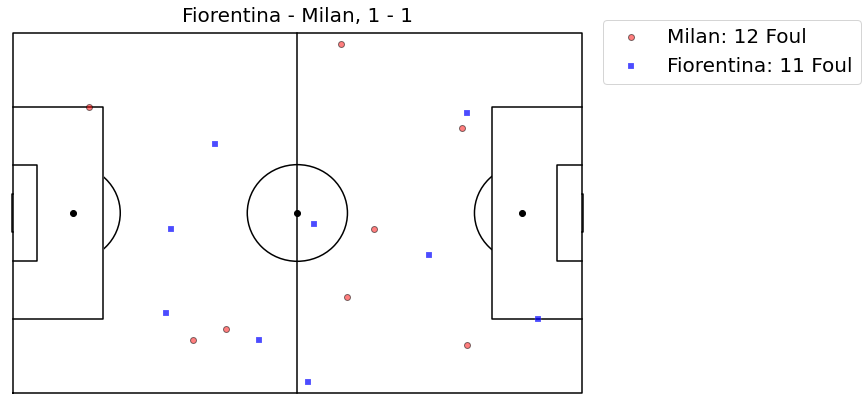

In [24]:
event_name = 'Foul' 
plot_events(team_id='both', event_name=event_name)

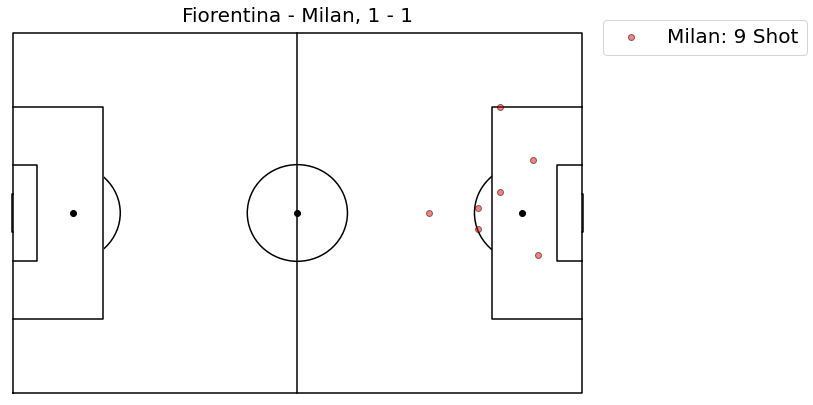

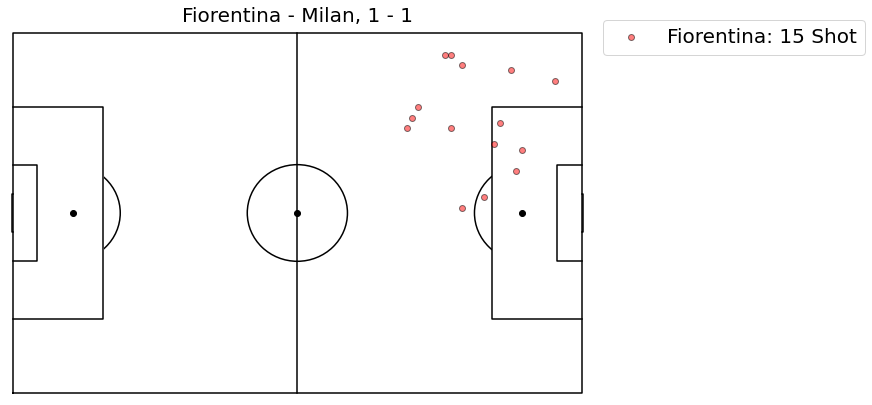

In [25]:
event_name = 'Shot'
plot_events(team_id=team1, event_name=event_name)
plot_events(team_id=team2, event_name=event_name)

## 6. <a id='spatial_distribution_events'>Distribución espacial de eventos (Gráficos de densidad)</a>

In [26]:
def plot_kde_events_on_field(sample_size=10000):
    """
    Generate density plots on the field for each event type
    
    Parameters
    ----------
    sample_size: int
        random sample of values to use (default: 10000). The code becomes slow is you increase this value
        significantly.
    """
    positions = []
    for match_events in match_id2events.values():
        for event in match_events:
            positions.append([event['eventName'], 
                              event['positions'][0]['x'], 
                              event['positions'][0]['y']])

    positions_df = pd.DataFrame(positions, columns=['eventName','x','y'])

    for event_type in EVENT_TYPES:
        pos_event_df = positions_df[positions_df['eventName'] == event_type]
        fig, ax = pitch()
        if len(pos_event_df) >= sample_size:
            x_y = pos_event_df[['x','y']].sample(sample_size).astype(float)
        else:
            x_y = pos_event_df[['x','y']].astype(float)
        
        sns.kdeplot(x_y['x'], x_y['y'], cmap = 'Greens', shade = True)
        
        plt.title(event_type, fontsize = 30)
        plt.xlim(-1,101)
        plt.ylim(-1,101)
        plt.axis('off')
        fig.tight_layout()
        plt.show()

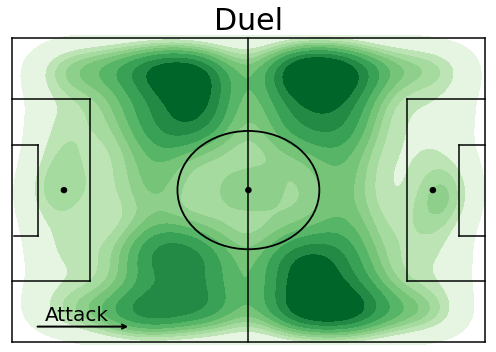

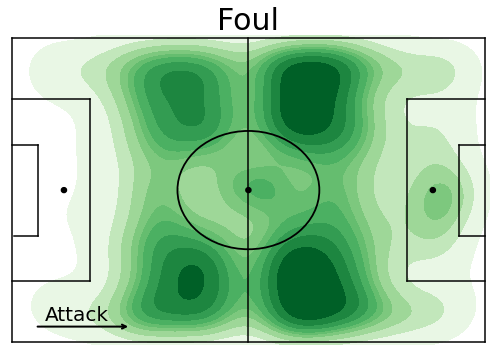

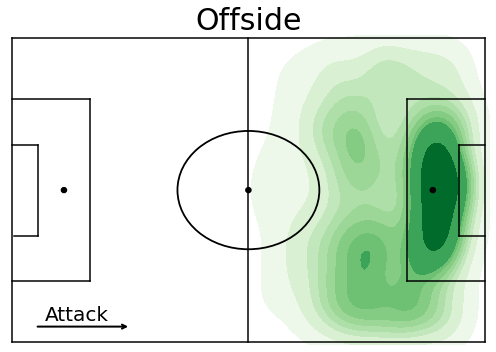

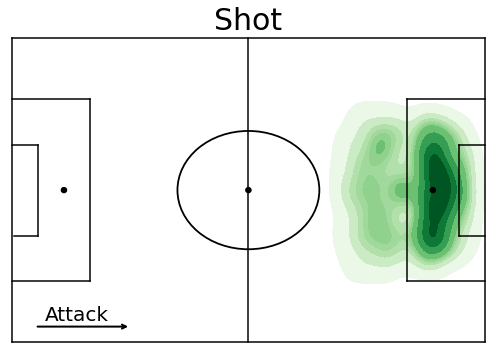

In [27]:
plot_kde_events_on_field(sample_size=10000)